# Pseudo Random Number Generation Using Python

When we want to simulate any stochastic behavior using computer simulation is essential to develop methods to generate random numbers. In this session we will learn the properties of random numbers and how to generate them.

## Random Numbers Properties

In many applications it is very important to have random numbers.

Board games, role-playing games, computer security (where there are keys that depend on choosing a random number) and, especially, when we want to simulate systems.

The problem → achieving randomness on purpose is practically impossible.

Let's start by talking about what we all know. Random numbers are numbers chosen at random, for example, a number from 1 to 100 where each of the numbers in this range have the same probability of appearing.

You might think, wow, it's not that hard, I'll just say the first number that pops into my head and that's it, random.

It has been demonstrated in many studies that if we ask thousands of people for a random number from 1 to 100, patterns appear immediately.
Numbers ending in 7 or 3 are much more frequent.
People say odd numbers more often than even numbers.
People almost never say numbers ending in 5 or 0.
You can try to survey thousands of people and have each one choose a number from 0 to 10 and you will realize how unrandom we humans are. It is very likely that 7 will be the most chosen number.
So…what do we do?

A random number is a result of a random variable combination specified by a probability distribution function. When no distribution is specified, it is assumed that the continuous uniform distribution in the interval [0,1] is used.
A numerical sequence is said to be statistically random when it contains no recognizable patterns or regularities; sequences such as the results of an ideal dice roll or the digits of π exhibit statistical randomness.
Statistical randomness does not necessarily imply "true" randomness, i.e., objective unpredictability. Pseudorandomness is sufficient for many uses, such as statistics, hence the name statistical randomness.

A sequence of random numbers must follow two important properties:

*   Uniformity, i.e., all numbers have the same probability of appearing.

*   Independence, i.e. the current value of a random variable has no relation to previous values.

The first step to simulate numbers from a distribution is to be able to independently simulate random numbers from a continuous uniform distribution between zero and one. From previous courses, you should remember the pdf and the cdf of a continuous uniform variable.

Therefore, if we want to extract a random value x that represents a number between 0 and 1, given that the random variable x takes any value of this interval with all values being equally likely, it is said that the random variable x has a continuous uniform probability distribution.

The second requirement the random numbers of the sequence generated need to respect is independence. This means that the probability of observing a value in a particular sub-interval of (0,1)  is independent of the previous values drawn.

Since we are not going to be able to generate purely random numbers, what we are going to do is to generate pseudo random numbers that fulfill the properties of uniformity and independence.
To do this, we are going to use Python.

Pseudo means false, in the sense that the numbers are not really random. They are generated according to a deterministic algorithm whose goal is to mimic as much as possible the appearance of randomness. In particular, for the sequence of random numbers generated means that they must resemble independent instances of a Uniform distribution between zero and one.
Possible deviations from the ideal numbers are:
*  The numbers are not uniformly distributed
*  The numbers may be discrete-valued instead of continuous
*  Independence may not be satisfied

Before looking at how we can construct pseudo-random numbers, let’s discuss some important properties/considerations that need to be taken into account when generating pseudo-random numbers:
*  The random generation should be very fast. In practice, we want to use random numbers to do other computations (for example simulate a little donut shop) and such computations might be computationally intensive: if random generation were to be slow, we would not be able to perform them.
*  The cycle of random generated numbers should be long. The cycle is the length of the sequence before numbers start to repeat themselves.
*  The random numbers should be repeatable. Given a starting point of the algorithm, it should be possible to repeat the exact same sequence of numbers. 
This is fundamental for debugging and for reproducibility.
*  The method should be applicable in any programming language/platform.
*  The random numbers should be independent and uniformly distributed.

Repeatability of the pseudo-random numbers is worth further consideration. It is fundamental in science to be able to reproduce experiments so that the validity of results can be assessed. 

In Python there is a specific function that allows us to do this, which is called random.seed. It is customary to choose as starting point of an algorithm the current year. So henceforth you will see the command:

```
random.seed(2023)
```

This ensures that every time the code following random.seed is run, the same results will be observed.

Python has all the capabilities to generate such numbers using random and numpy. This can be done with the function `uniform`, which takes three inputs: the starting point, the endpoint, and the number of observations to generate. So for instance:

In [20]:
import numpy as np
np.random.seed(2023)
np.random.uniform(0,1,10)

array([0.3219883 , 0.89042245, 0.58805226, 0.12659609, 0.14134122,
       0.46789559, 0.02208966, 0.72727471, 0.52438734, 0.54493524])

generates ten random numbers between zero and one. Notice that if we repeat the same code we get the same result since we fixed the so-called seed of the simulation.

Conversely, if we were to simply run the code `np.random.uniform(0,1,10)` we would get a different result.



In [ ]:
np.random.uniform(0,1,10)

array([0.45637326, 0.50138226, 0.39446855, 0.1511723 , 0.36087518,
       0.16207701, 0.33795869, 0.18032328, 0.3909914 , 0.03564821])

## The Linear Congruential Method

Although we will use the functions already implemented in Python, it is useful to at least introduce one of the most classical algorithms to simulate random numbers, called the linear congruential method. This produces a sequence of integers `X1, X2, X3,..., Xn` between `0` and `m - 1` using this formula:

$ X_i = (aX_i + c) \ mod \ m$

$for \ i = 1,2,...$

Where there are three parameters that need to be chosen: a, c and m.

*  $mod \ m$  is the remainder of the integer division by $m$. For instance 5 mod 2 is one and 4 mod 2 is zero.
*  therefore, the algorithm generates integers between 0 and $m−1$.
*  there are three parameters that need to be chosen $a$, $c$ and $m$.
*  the value $x0$ is the seed of the algorithm.

Random numbers between zero and one can be derived by setting:

$ u_i = x_i/m $

Let’s look at an implementation in Python:

In [8]:
import numpy as np
def LCM(n, seed, a, c, m):
  x = []
  x.append(seed)
  for i in range(1,n+1):
    x.append((a*x[i-1]+c)%m)
  u = np.around(np.array(x)/m, 3)
  return(list(u))


In [15]:
LCM(n=8, seed=4, a = 13, c = 0, m = 64)

[0.062, 0.812, 0.562, 0.312, 0.062, 0.812, 0.562, 0.312, 0.062]

We can see that this specific choice of parameters is quite bad: it has cycle 4. After 4 numbers the sequence repeats itself and we surely would not like to use this in practice.

The standard values for these parameters in most programming frameworks are the next:

In [31]:
LCM(n = 9, seed = 21, a = 1103515245, c = 12345, m = 2**32)

[0.0, 0.396, 0.794, 0.193, 0.363, 0.382, 0.137, 0.977, 0.853, 0.996]

In general you should not worry of these issues, Python does things properly for you.

## Tests of Randomness

As we have already said, generating truly random numbers is practically impossible to do (although quantum systems are now beginning to exist that are close to achieving it). This is why, computationally, what we are going to do is to generate pseudo-random numbers with Python that will be considered valid if they comply with the properties of randomness.

To check this, let's test if our sequence of random numbers complies with the rules of uniformity and independence.
* Does the sequence of our pseudo-random numbers follow a uniform distribution?
* Are they independent?

### Uniformity Test
A simple first method to check if the numbers are uniform is to create a histogram of the data and to see if the histogram is reasonably flat. In order to do this, we can use the `plt.hist` function of Python importing `matplotlib.pyplot as plt`.

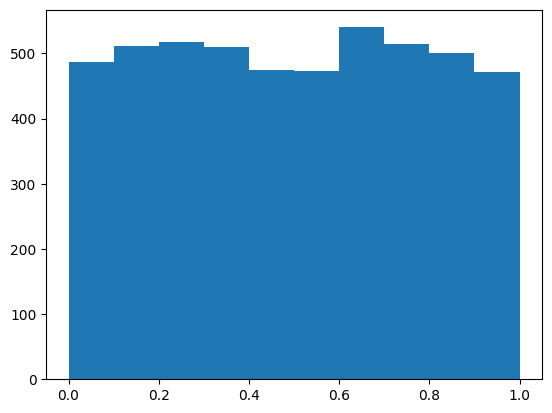

In [32]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2023)
u = np.random.uniform(0,1,5000)
plt.hist(u)
plt.show()

We can see that the histogram is reasonably flat and therefore the assumption of uniformity seems to hold. Although the histogram is quite informative, it is not a fairly formal method. On the other hand, we could do a hypothesis test that follows this form:

*  $H_0$: $u_i$ is uniform between zero and one, $i = 1,2,...$
*  $H_a$: $u_i$ is not uniform between zero and one, $i = 1,2,...$

If we reject the null hypothesis, which happens if the p-value of the test is very small (or smaller than a critical value $α$ of our choice), then we would say that, with a confidence level of $(1-α)$ * 100%, we have enough statistical evidence to reject the $H_0$. 

There are several ways to carry out such a test, but we will consider here only one: the so-called Kolmogorov-Smirnov Test. We will not talk about all the details of this test, but only its interpretation and implementation.

In order to understand how the test works we need to briefly introduce the concept of empirical cumulative distribution function or ecdf. The ecdf $Fhat$ is the cumulative distribution function computed from a sequence of N numbers as

$ \hat{F}(t) = \dfrac{numbers \ in \ the \ sequence \le t}{N}$

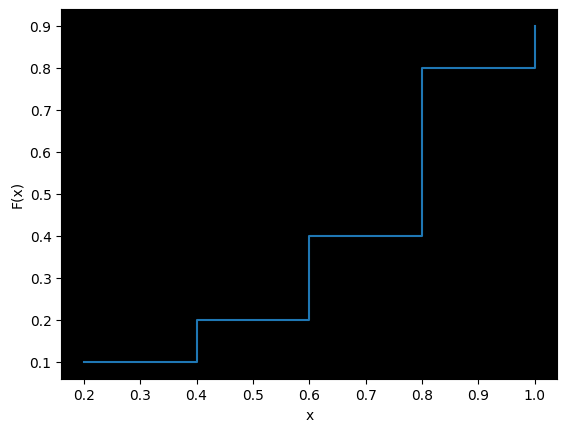

In [47]:
import matplotlib.pyplot as plt

# the values
values = [0.1, 0.2, 0.4, 0.8, 0.9]

# sort the values
values.sort()

# calculate the ECDF
x = [i/len(values) for i in range(1, len(values)+1)]
y = values

# plot the ECDF
plt.step(x, y, where='post')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()


The idea behind the Kolmogorov-Smirnov test is to quantify how similar the ecdf computed from a sequence of data is to the one of the uniform distribution which is represented by a straight line (figure in slide 10).

The test formally embeds this idea of similarity between the ecdf and the cdf of the uniform in a test of hypothesis. The function `stats.kstest` from the `scipy` library implements this test in Python. For the two sequences `u1` and `u2` of the slide 10, the test can be implemented as following:

In [ ]:
from scipy import stats
import numpy as np

np.random.seed(2023)

# create a sample of random numbers
u1 = np.random.uniform(0, 1, 5000)
u2 = np.random.normal(0, 1, 5000)

# perform the Kolmogorov-Smirnov test
D, p_value = stats.kstest(u1, 'uniform')

# print the results
print("u1 results for the KS test:")
print("D-statistic: ", D)
print("p-value: ", p_value)


# perform the Kolmogorov-Smirnov test
D, p_value = stats.kstest(u2, 'uniform')

# print the results
print("")
print("u2 results for the KS test:")
print("D-statistic: ", D)
print("p-value: ", p_value)

u1 results for the KS test:
D-statistic:  0.009203339815548828
p-value:  0.7871760543440489

u2 results for the KS test:
D-statistic:  0.4868
p-value:  0.0


From the results that the p-value of the test for the sequence `u1` is `0.787` and so we would not be able to reject the H0 that the sequence is uniformly distributed. 
On the other hand the p-value for the test over the sequence `u2` has an extremely small p-value therefore suggesting that we reject the $H_0$ and conclude that the sequence is not uniformly distributed. 
This confirms our intuition.

### Independence Test

The second requirement that a sequence of pseudo-random numbers must have is independence. We already saw an example of when this might happen: a high number was followed by a low number and vice versa. We will consider tests of the form:

*  $H_0$: $u_1 ,..., u_N$ are independent
*  $H_a$: $u_1 ,..., u_N$ are not independent

So the $H_0$ is that the sequence is of independent numbers against the Ha that they are not. If the p-value of such a test is smaller than ɑ we would then reject the $H_0$ of independence.

In order to devise such a test, we need to come up with a way to quantify how dependent numbers in a sequence are on each other. Again, there are many ways one could do this, but we will consider only one.

You should already be familiar with the idea of correlation: this tells you how two variables are linearly dependent on each other. There is a similar idea which extends in a way correlation to the case when it is computed between a sequence of numbers and itself, which is called autocorrelation.

Suppose you have two sequences of numbers $u_1,..., u_N$ and $w_1,..., w_N$. To compute the correlation you would look at the pairs $(u_1, w_1), (u_2, w_2),..., (u_N, w_N)$ which consider two consecutive numbers and compute their correlation. SImilarly, we could compute the correlation between $(u_1, u_{1+k}), (u_2, u_{2+k}),..., (u_{N-k}, u_N)$ between each number in the sequence and the one k-positions ahead. This is what we call autocorrelation of $lag \ k$. 

If autocorrelations of several lags are close to zero, this gives an indication that the data is independent. If, on the other hand, the autocorrelation at some lags is big, then there is an indication of dependence in the sequence of random numbers.

Autocorrelations are computed and plotted in Python using the `autocorrelation_plot` function from `pandas`.

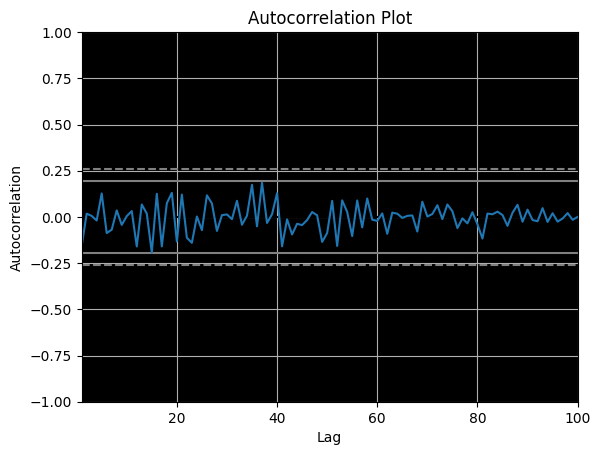

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# create a sample of random numbers
sample = np.random.uniform(0, 1, 100)

# create a DataFrame from the sample
df = pd.DataFrame(sample, columns=['values'])

# create the autocorrelation plot
pd.plotting.autocorrelation_plot(df['values'])

# add a title and show the plot
plt.title('Autocorrelation Plot')
plt.show()


The blue line in the previous plot is the autocorrelation at several lags, whilst the dashed grey lines are confidence bands: if the line is within the bands it means that we cannot reject the hypothesis that the autocorrelation of the associated lag is equal to zero, and, therefore, we would not be able to reject the $H_0$ that the values are independent.

Since the line is always within the confidence bands, we have enough statistical evidence to say that all autocorrelations are not different from zero and consequently that the data is independent (it was indeed generating using the `np.random.uniform` function). 

The example in the next chunk reports the autocorrelations of a sequence of numbers which is not independent. Although the histogram shows that the data is uniformly distributed, we would not be able to say that the sequence is of independent numbers since autocorrelations are very large and outside the bands.

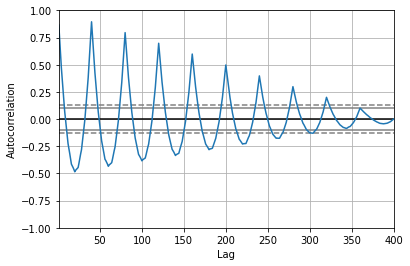

In [ ]:
u2 = np.array(list(np.repeat(np.arange(1, 11), repeats=4))*10)/10
u2 = u2 + np.random.normal(0, 0.02, size=400)
u2 = (u2 - np.min(u2)) / (np.max(u2) - np.min(u2))
df = pd.DataFrame(u2, columns=['values'])
pd.plotting.autocorrelation_plot(df['values'])

(array([40., 40., 41., 39., 41., 39., 40., 40., 40., 40.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

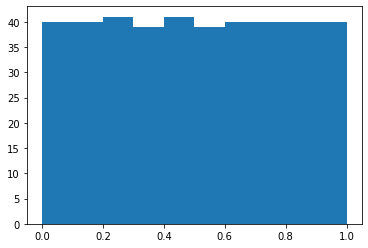

In [ ]:
plt.hist(u2)

A test of hypothesis for independence can be created by checking if any of the autocorrelations up to a specific lag are different from zero. This is could be done by using the function `q_stat` from the `statsmodels.tsa.stattools` module in Python. 
First we have to calculate the autocorrelation function using `acf`, so then we can apply the Box test to the values of the autocorrelation function in different lags (10 in this case) 
Let’s compute it for the two sequences u1 and u2 that we have defined before.


In [ ]:
import statsmodels.tsa.stattools as stattools

acf, confint = stattools.acf(u1, nlags=10, alpha=0.05)
lbvalue, pvalue = stattools.q_stat(acf[1:], len(u1))

print("u1 results for the Box test with 10 lags")
print("p-value:", pvalue)

u1 results for the Box test with 10 lags
p-value: [0.96581617 0.03701624 0.05946906 0.1055912  0.15306332 0.22903488
 0.32146211 0.29458467 0.27576648 0.09950889]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [ ]:
import statsmodels.tsa.stattools as stattools

acf, confint = stattools.acf(u2, nlags=10, alpha=0.05)
lbvalue, pvalue = stattools.q_stat(acf[1:], len(u2))

print("u2 results for the Box test with 10 lags")
print("p-value:", pvalue)

u2 results for the Box test with 10 lags
p-value: [1.59858978e-067 2.70919117e-113 3.53335601e-144 8.59528261e-163
 1.19838072e-173 6.70853469e-179 2.53373495e-180 1.08075124e-179
 1.15262943e-178 3.25495871e-178]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Here we chose a lag of 10 (it is usually not useful to consider larger lags), but you may want to try a different value. The test confirms our observations of the autocorrelations.

For the sequence `u1` generated the test has a p-value greater than any reasonable value for ɑ for any lag and therefore we cannot reject the $H_0$ (independent). 

For the second sequence `u2` which had very large autocorrelations has a p-value smaller than any reasonable value for ɑ for all lags and therefore we have enough statistical evidence reject the $H_0$ (not independent).